# 1. Downlord the dataset

In [1]:
!pip install kaggle --upgrade

In [2]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet
!pip install opendatasets --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.2 MB/s eta 0:00:00


In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data'


In [5]:
od.download(dataset_url)

Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [6]:
data_dir = 'new-york-city-taxi-fare-prediction'

In [7]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Apr  4 16:05 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Apr  4 16:05 sample_submission.csv
-rw-r--r-- 1 root root 960K Apr  4 16:05 test.csv
-rw-r--r-- 1 root root 5.4G Apr  4 16:06 train.csv


In [8]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [9]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [10]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [11]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [12]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [13]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [14]:
import pandas as pd
import random

In [15]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [16]:
dtypes = {
 'fare_amount' : 'float32',
 'pickup_longitude' : 'float32',
 'pickup_latitude' : 'float32',
 'dropoff_longitude' : 'float32',
 'dropoff_latitude' : 'float32',
 'passenger_count' : 'uint8'
}
def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > 0.01

random.seed(42)
df = pd.read_csv(data_dir+'/train.csv',
                 usecols=selected_cols,
                 parse_dates = ['pickup_datetime'],
                 dtype=dtypes,
                 skiprows=skip_row)

In [17]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


In [18]:
test_df = pd.read_csv(data_dir+'/test.csv',dtype=dtypes, parse_dates=['pickup_datetime'])

In [19]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


# 2. Explore and analyze the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [22]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [25]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

# 3. Prepare the dataset for ML training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
len(train_df), len(val_df)

(441960, 110490)

In [29]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [30]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [32]:
target_col = 'fare_amount'

## Training

In [33]:
train_inputs = train_df[input_cols]

In [34]:
train_targets = train_df[target_col]

In [35]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [36]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [37]:
val_inputs = val_df[input_cols]

In [38]:
val_targets = val_df[target_col]

In [39]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [40]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [41]:
test_inputs = test_df[input_cols]

In [42]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


# 4. Train hardcoded and baseline models

In [43]:
import numpy as np

In [44]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [45]:
mean_model = MeanRegressor()

In [46]:
mean_model.fit(train_inputs, train_targets)

In [47]:
mean_model.mean

np.float32(11.354714)

In [48]:
train_preds = mean_model.predict(train_inputs)

In [49]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [50]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [51]:
val_preds = mean_model.predict(val_inputs)

In [52]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [53]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
def rmse(targets, preds):
  return np.sqrt(mean_squared_error(targets, preds))

In [56]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

np.float64(9.789781840838485)

In [57]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

np.float64(9.89995425435296)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()

In [60]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [61]:
train_preds = linear_model.predict(train_inputs)

In [62]:
train_preds

array([11.546237, 11.28461 , 11.28414 , ..., 11.458918, 11.284281,
       11.284448], dtype=float32)

In [63]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [64]:
rmse(train_targets, train_preds)

np.float64(9.788632662774626)

In [65]:
val_preds = linear_model.predict(val_inputs)

In [66]:
rmse(val_targets, val_preds)

np.float64(9.898088336136475)

# 5. Make prediction and submit to kaggle

In [67]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [68]:
test_preds = linear_model.predict(test_inputs)

In [69]:
test_preds

array([11.28428  , 11.284634 , 11.284384 , ..., 11.721249 , 11.7207985,
       11.720594 ], dtype=float32)

In [70]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [71]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [72]:
sub_df['fare_amount'] = test_preds

In [73]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [74]:
sub_df.to_csv('linear_model_submission.csv', index = None)

### function to make the submission file

In [75]:
def predict_and_submit(model, test_inputs, fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index = None)
  return sub_df

In [76]:
predict_and_submit(linear_model, test_inputs, 'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [77]:
def add_dateparts(df, col):
  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day
  df[col + '_weekday'] = df[col].dt.weekday
  df[col + '_hour'] = df[col].dt.hour

In [78]:
add_dateparts(train_df, 'pickup_datetime')

In [79]:
add_dateparts(val_df, 'pickup_datetime')

In [80]:
add_dateparts(test_df, 'pickup_datetime')

In [81]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [82]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16


# 6. Perform feature engineering

In [83]:
import numpy as np
def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
  c = 2 * np.arcsin(np.sqrt(a))
  km = 6367 * c
  return km

In [84]:
def add_trip_distance(df):
  df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                     df['pickup_latitude'],
                                     df['dropoff_longitude'],
                                     df['dropoff_latitude'])

In [85]:
add_trip_distance(train_df)

In [86]:
add_trip_distance(val_df)

In [87]:
add_trip_distance(test_df)

In [88]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


### Add distance from popular landmarks
JFK AIRPORT
LGA AIRPORT
EWR AIRPORT
MET MEUSEUM
WORLD TRADE CENTER

In [89]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [90]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
  lon, lat = landmark_lonlat
  df[landmark_name + '_dropoff_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [91]:
def add_landmarks(df):
  landmarks = [('jfk', jfk_lonlat),('lga', lga_lonlat),('ewr', ewr_lonlat),('met', met_lonlat),('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(df, name, lonlat)

In [92]:
add_landmarks(train_df)

In [93]:
add_landmarks(val_df)

In [94]:
add_landmarks(test_df)

In [95]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [96]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_dropoff_distance,lga_dropoff_distance,ewr_dropoff_distance,met_dropoff_distance,wtc_dropoff_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042799,0.033542,0.039093,0.035436,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969877,3.303940,3.295646,4.035816,4.018422,4.252535
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


### use this range:
- fare amount : $1 to 500
- longitudes : -75 to -72
- latitude : 40 to 42
- passenger_count : 1 to 6

In [118]:
def remove_outlier(df):
  return df[(df['fare_amount'] >= 1.) &
           (df['fare_amount'] <= 500.) &
           (df['pickup_longitude'] >= -75) &
           (df['pickup_longitude'] <= -72) &
           (df['dropoff_longitude'] >= -75) &
           (df['dropoff_longitude'] <= -72) &
            (df['pickup_latitude'] >= 40) &
            (df['pickup_latitude'] <= 42) &
            (df['dropoff_latitude'] >= 40) &
            (df['dropoff_latitude'] <= 42) &
            (df['passenger_count'] >= 1) &
            (df['passenger_count'] <= 6)]

In [119]:
train_df = remove_outlier(train_df)

In [120]:
val_df = remove_outlier(val_df)

In [121]:
train_df.to_parquet('train.parquet')

In [122]:
val_df.to_parquet('val.parquet')

# 7. Train and Evaluate different models

## train each of the following & submit prediction to kaggle:
- Ridge Regression
- Random Forest
- Gradient Boosting


In [123]:
 train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_dropoff_distance', 'lga_dropoff_distance', 'ewr_dropoff_distance',
       'met_dropoff_distance', 'wtc_dropoff_distance'],
      dtype='object')

In [124]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_dropoff_distance', 'lga_dropoff_distance', 'ewr_dropoff_distance',
       'met_dropoff_distance', 'wtc_dropoff_distance']

In [125]:
target_col = 'fare_amount'

In [126]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [127]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [128]:
test_inputs = test_df[input_cols]

### Lets define a helper function to evaluate models.

In [129]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = rmse(train_targets, train_preds)
  val_preds = model.predict(val_inputs)
  val_rmse = rmse(val_targets, val_preds)
  return train_rmse, val_rmse, train_preds, val_preds

## Ridge Regression

In [130]:
from sklearn.linear_model import Ridge

In [131]:
model1 = Ridge(random_state=42)

In [132]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [133]:
evaluate(model1)

(np.float64(5.049315152700728),
 np.float64(5.217865657326987),
 array([ 8.12925918,  4.11578439,  8.75063014, ..., 10.47234932,
         8.2305928 , 10.58672774]),
 array([10.91955339,  6.20493172, 46.21787888, ...,  8.0463052 ,
        25.56885585,  8.45342102]))

In [134]:
train_inputs.shape

(431098, 16)

In [135]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.082151
1,2015-01-27 13:08:24.0000003,11.399499
2,2011-10-08 11:53:44.0000002,5.356923
3,2012-12-01 21:12:12.0000002,8.763571
4,2012-12-01 21:12:12.0000003,14.609918
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024995
9910,2015-01-12 17:05:51.0000001,11.218598
9911,2015-04-19 20:44:15.0000001,47.926481
9912,2015-01-31 01:05:19.0000005,22.600022


## Random forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
model2 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100)

In [139]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 24min 52s, sys: 4.7 s, total: 24min 56s
Wall time: 16min 42s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [140]:
evaluate(model2)

(np.float64(1.441619487860951),
 np.float64(4.067183376558867),
 array([ 6.075     ,  5.23870007, 10.56      , ..., 10.32900023,
        10.36399979,  9.29      ]),
 array([14.7499    ,  5.65400005, 48.20220015, ...,  8.42970006,
        30.65349987,  8.95      ]))

In [141]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.400000
1,2015-01-27 13:08:24.0000003,10.215000
2,2011-10-08 11:53:44.0000002,4.757000
3,2012-12-01 21:12:12.0000002,9.390000
4,2012-12-01 21:12:12.0000003,14.963000
...,...,...
9909,2015-05-10 12:37:51.0000002,8.740000
9910,2015-01-12 17:05:51.0000001,13.185000
9911,2015-04-19 20:44:15.0000001,54.251301
9912,2015-01-31 01:05:19.0000005,21.310000


### Gradient Boosting

In [142]:
from xgboost import XGBRegressor

In [143]:
model3 = XGBRegressor(max_depth=5,objective = 'reg:squarederror', n_estimators=200, random_state=42, n_jobs=-1)

In [144]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [145]:
evaluate(model3)

(np.float64(3.1945446182982544),
 np.float64(4.027132992636432),
 array([ 6.5086284,  8.475021 , 10.250745 , ..., 11.6175   ,  9.493622 ,
        10.145834 ], dtype=float32),
 array([14.869394 ,  5.5537467, 48.604473 , ...,  7.853152 , 31.240097 ,
         8.467824 ], dtype=float32))

In [146]:
predict_and_submit(model3, test_inputs, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.296623
1,2015-01-27 13:08:24.0000003,11.594138
2,2011-10-08 11:53:44.0000002,4.860382
3,2012-12-01 21:12:12.0000002,8.774776
4,2012-12-01 21:12:12.0000003,15.982100
...,...,...
9909,2015-05-10 12:37:51.0000002,9.169091
9910,2015-01-12 17:05:51.0000001,11.624935
9911,2015-04-19 20:44:15.0000001,53.426765
9912,2015-01-31 01:05:19.0000005,19.824623


# 8. Tune hyperparrameter for the best models

In [147]:
import matplotlib.pyplot as plt

In [154]:
def test_params(ModelClass, **params):
  model = ModelClass(**params).fit(train_inputs, train_targets)
  train_rmse = rmse(model.predict(train_inputs), train_targets)
  val_rmse = rmse(model.predict(val_inputs), val_targets)
  return train_rmse, val_rmse

In [155]:
def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
  train_errors, val_errors = [], []
  for value in param_values:
    params = dict(other_params)
    params[param_name] = value
    train_rmse, val_rmse = test_params(ModelClass, **params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

  plt.figure(figsize=(10, 6))
  plt.title('overfitting curve: ' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

In [158]:
best_params = {'random_state':42, 'n_jobs':-1, 'objective': 'reg:squarederror', 'learning_rate': 0.05}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:30:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 33.6 s, sys: 62 ms, total: 33.7 s
Wall time: 22.2 s


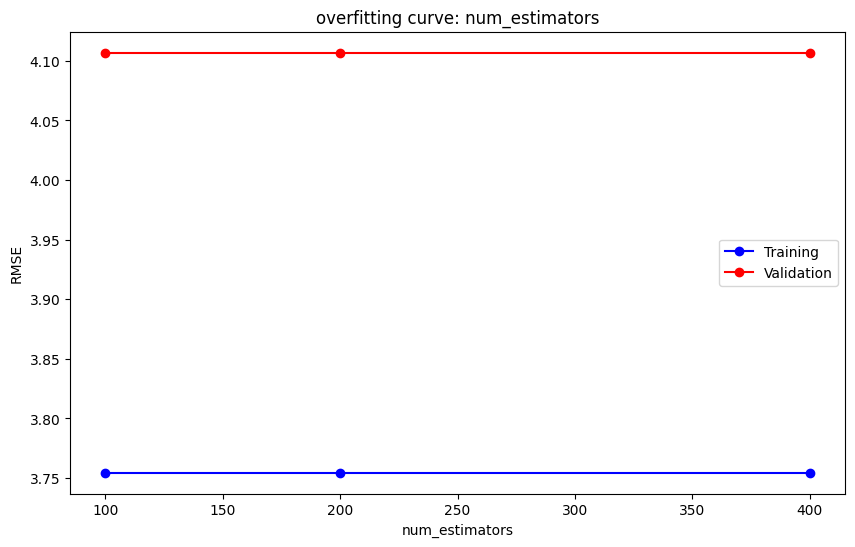

In [159]:
%%time
test_param_and_plot(XGBRegressor, 'num_estimators', [100, 200, 400], **best_params)

In [162]:
best_params['num_estimators'] = 100

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:37:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:37:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:37:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


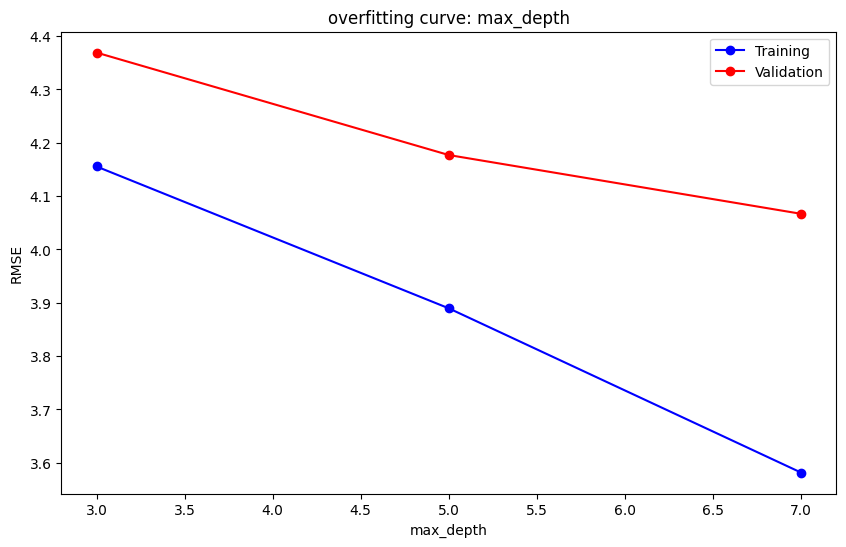

In [163]:
#Max depth
test_param_and_plot(XGBRegressor, 'max_depth', [3, 5, 7], **best_params)

In [161]:
#looks like a max depth of 5 is ideal

In [166]:
best_params['max_depth'] = 7

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


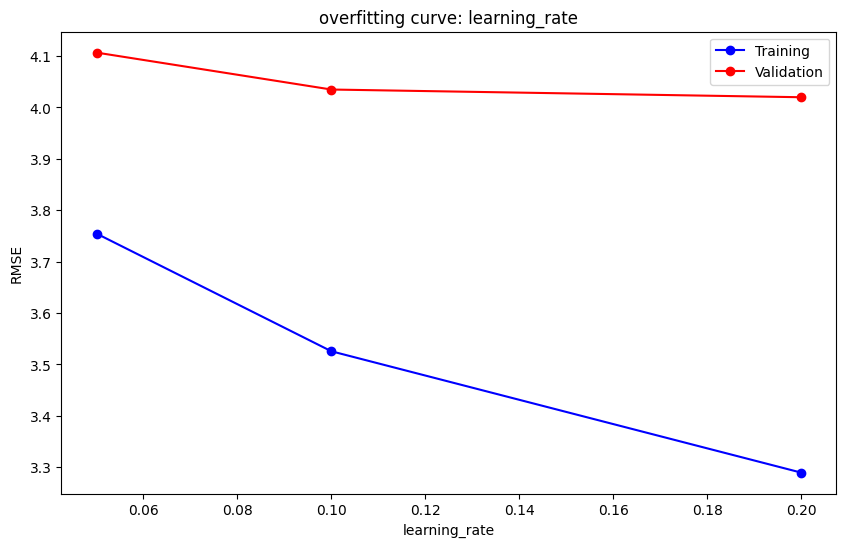

In [165]:
# Learning rate
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.2], **best_params)

In [ ]:
best_params['learning_rate'] = ???

In [168]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=8, learning_rate=0.08, subsample=0.7, colsample_bytree=0.7)

In [169]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [170]:
evaluate(xgb_model_final)

(np.float64(2.4741629639706306),
 np.float64(3.966788340286547),
 array([ 6.6620617,  4.550083 ,  9.9483595, ..., 11.905938 ,  9.796412 ,
         9.809491 ], dtype=float32),
 array([14.801133 ,  5.760131 , 47.978344 , ...,  7.7943974, 31.304565 ,
         8.555287 ], dtype=float32))

In [174]:
predict_and_submit(xgb_model_final,test_inputs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.798772
1,2015-01-27 13:08:24.0000003,10.853344
2,2011-10-08 11:53:44.0000002,4.569136
3,2012-12-01 21:12:12.0000002,9.015932
4,2012-12-01 21:12:12.0000003,16.319820
...,...,...
9909,2015-05-10 12:37:51.0000002,8.748536
9910,2015-01-12 17:05:51.0000001,11.644195
9911,2015-04-19 20:44:15.0000001,54.579315
9912,2015-01-31 01:05:19.0000005,20.636919


# 9. Train on a GPU with the entire dataset

# 10. Document and publish the project online